In [9]:
import boto3

BUCKET = "amazon-rekognition"
KEY = "Lenna.png"
FEATURES_BLACKLIST = ("Landmarks", "Emotions", "Pose", "Quality", "BoundingBox", "Confidence")

def detect_faces(bucket, key, attributes=['ALL'], region="us-east-1"):
    rekognition = boto3.client("rekognition", region)
    with open(key, 'rb') as image_file:
        f=image_file.read()
    response = rekognition.detect_faces(Image={"Bytes": bytearray(f)},Attributes=attributes,)
    return response['FaceDetails']

for face in detect_faces(BUCKET, KEY):
	print ("Face ({Confidence}%)".format(**face))
	# emotions
	for emotion in face['Emotions']:
		print ("  {Type} : {Confidence}%".format(**emotion))
	# quality
	for quality, value in face['Quality'].iteritems():
		print ("  {quality} : {value}".format(quality=quality, value=value))
	# facial features
	for feature, data in face.iteritems():
		if feature not in FEATURES_BLACKLIST:
			print ("  {feature}({data[Value]}) : {data[Confidence]}%".format(feature=feature, data=data))

"""
	Expected output:
	Face (99.945602417%)
	  SAD : 14.6038293839%
	  HAPPY : 12.3668470383%
	  DISGUSTED : 3.81404161453%
	  Sharpness : 10.0
	  Brightness : 31.4071826935
	  Eyeglasses(False) : 99.990234375%
	  Sunglasses(False) : 99.9500656128%
	  Gender(Male) : 99.9291687012%
	  EyesOpen(True) : 99.9609146118%
	  Smile(False) : 99.8329467773%
	  MouthOpen(False) : 98.3746566772%
	  Mustache(False) : 98.7549591064%
	  Beard(False) : 92.758682251%
"""

Face (99.99998474121094%)
  CALM : 75.35225677490234%
  HAPPY : 1.768756628036499%
  DISGUSTED : 6.795713424682617%
  ANGRY : 6.032111644744873%
  SURPRISED : 6.109055995941162%
  CONFUSED : 0.0%
  SAD : 2.9309804439544678%


AttributeError: 'dict' object has no attribute 'iteritems'

In [85]:
import boto3
import json



def text_analyse(text):
    comprehend = boto3.client(service_name='comprehend', region_name='us-east-1')
    print('Calling DetectKeyPhrases')
    a=json.dumps(comprehend.detect_sentiment(Text=text, LanguageCode='en'), sort_keys=True, indent=4)
    aa=json.loads(a)
    print(aa['SentimentScore'])#for i in range(len(a["KeyPhrases"])-1))
    print('End of DetectKeyPhrases\n')
    
text_analyse("once a pon a time there was a village in cambridge ")

Calling DetectKeyPhrases
{'Mixed': 0.0039220028556883335, 'Negative': 0.009863384068012238, 'Neutral': 0.954142153263092, 'Positive': 0.032072439789772034}
End of DetectKeyPhrases



In [83]:
from quickdraw import QuickDrawData

qd = QuickDrawData()

anvil = qd.get_drawing("pig")
anvil.image.save("my_anvil.gif")

loading pig drawings
load complete


In [16]:
subscription_key = "52e2c8faa1144077b4f44ef952f761db"
assert subscription_key

In [17]:
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"

In [26]:
search_term = "three pigs cartoon"

In [90]:
import requests

def phrase_to_image(search_term):
    headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
    params  = {"q": search_term, "license": "public", "imageType": "AnimatedGif"}
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()
    #return search_results["value"][1]["thumbnailUrl"]
    return search_results

print (phrase_to_image("three pigs house fortune"))




{'_type': 'Images', 'instrumentation': {'_type': 'ResponseInstrumentation'}, 'value': [], 'pivotSuggestions': [{'pivot': 'three pigs', 'suggestions': []}, {'pivot': 'house', 'suggestions': []}, {'pivot': 'fortune', 'suggestions': []}], 'relatedSearches': [{'text': 'Three Little Pigs', 'displayText': 'Three Little Pigs', 'webSearchUrl': 'https://www.bing.com/images/search?q=Three+Little+Pigs&FORM=IRPATC', 'searchLink': 'https://api.cognitive.microsoft.com/api/v7/images/search?q=Three+Little+Pigs', 'thumbnail': {'thumbnailUrl': 'https://tse4.mm.bing.net/th?q=Three+Little+Pigs&pid=Api&mkt=en-GB&adlt=moderate&t=1'}}, {'text': 'Big Bad Wolf', 'displayText': 'Big Bad Wolf', 'webSearchUrl': 'https://www.bing.com/images/search?q=Big+Bad+Wolf&FORM=IRPATC', 'searchLink': 'https://api.cognitive.microsoft.com/api/v7/images/search?q=Big+Bad+Wolf', 'thumbnail': {'thumbnailUrl': 'https://tse4.mm.bing.net/th?q=Big+Bad+Wolf&pid=Api&mkt=en-GB&adlt=moderate&t=1'}}, {'text': 'Three Little Pigs Straw House

In [89]:
image_data = requests.get(phrase_to_image("three pigs cartoon "))
image_data.raise_for_status()
image = Image.open(BytesIO(image_data.content)) 
image.show()

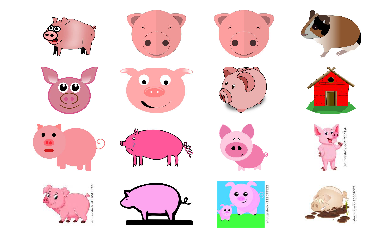

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

f, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

In [91]:
import os 


In [93]:
os.system("aaa.mp3")



32512

In [98]:
import simpleaudio as sa 
play_obj = sa.play_buffer("aaa.mp3", 2, 2, 44100)

TypeError: a bytes-like object is required, not 'str'

In [2]:
from mutagen.mp3 import MP3 as mp3
import pygame
import time

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
def which_audio(senti):
    
    # defining the audio clips
    negative_music = 'Beethoven-MoonlightSonata.mp3'    
    positive_music = 'SCOTT_JOPLIN_The_Entertainer.mp3'
    
    if senti < 0.4:
        audio_clip = negative_music
    elif senti > 0.6:
        audio_clip = positive_music
        
    return audio_clip
    

In [9]:
#filename = 'Beethoven-MoonlightSonata.mp3' #再生したいmp3ファイル
senti = 0.3
pygame.mixer.init()
 #再生開始。1の部分を変えるとn回再生(その場合は次の行の秒数も×nすること)
#time.sleep(mp3_length + 0.25) #再生開始後、音源の長さだけ待つ(0.25待つのは誤差解消)
for i in range(3):
    audio_file = which_audio(senti)
    print(audio_file)
    pygame.mixer.music.load(audio_file) #音源を読み込み
    #mp3_length = mp3(audio_file).info.length #音源の長さ取得
    pygame.mixer.music.play(1)
    time.sleep(5)
    pygame.mixer.music.stop()
    senti = 1 - senti
 #音源の長さ待ったら再生停

Beethoven-MoonlightSonata.mp3
SCOTT_JOPLIN_The_Entertainer.mp3
Beethoven-MoonlightSonata.mp3
